In [6]:
'''SCRAMBLING PROCESS'''
import numpy as np
from PIL import Image

def load_indices_from_file(indices_path):
    """
    Load the indices from a text file.
    """
    with open(indices_path, 'r') as file:
        indices = [int(line.strip()) for line in file if line.strip().isdigit()]
    return indices

def scramble_image(image_array, indices):
    """
    Scramble an image represented as a 2D array using provided indices.
    """
    # Flatten the image into a 1D array
    flat_image = image_array.flatten()

    # Ensure the number of indices matches the number of pixels in the image
    if len(indices) != len(flat_image):
        raise ValueError("Number of indices does not match the number of pixels in the image!")

    # Create a scrambled array
    scrambled_image_array = np.zeros_like(flat_image)

    # Assign pixels to the new scrambled positions based on the provided indices
    for original_index, scrambled_index in enumerate(indices):
        if 0 <= scrambled_index < len(flat_image):  # Check if index is valid
            scrambled_image_array[scrambled_index] = flat_image[original_index]
        else:
            print(f"Warning: Index {scrambled_index} is out of bounds for the image.")

    return scrambled_image_array  # Return scrambled 1D array

def descramble_image(scrambled_array, indices):
    """
    Descramble an image represented as a 1D array using provided indices.
    """
    # Create an array for the original image
    original_image_array = np.zeros_like(scrambled_array)

    # Assign pixels back to their original positions based on the provided indices
    for original_index, scrambled_index in enumerate(indices):
        if 0 <= original_index < len(original_image_array):  # Check if original index is valid
            original_image_array[original_index] = scrambled_array[scrambled_index]
        else:
            print(f"Warning: Index {original_index} is out of bounds for the image.")

    return original_image_array  # Return descrambled 1D array

# Paths to the input image and indices file
input_image_path = r"C:\Users\srisu\Encryption Project\pelvis_results\pelvis.jpg"
indices_path = r"C:\Users\srisu\Encryption Project\ikeda_and_logistic_indices.txt"

# Load the indices from the file
indices = load_indices_from_file(indices_path)

# Load the image as a numpy array
image = Image.open(input_image_path).convert('L')  # Convert to grayscale
image_array = np.array(image)

# Scramble the image
scrambled_array1 = scramble_image(image_array, indices)
scrambled_array1 = scrambled_array1.reshape(256, 256)  # Reshape into 256x256
print("Scrambled array:\n", scrambled_array1)

# Descramble the image
descrambled_array = descramble_image(scrambled_array1.flatten(), indices)  # Flatten for descrambling
descrambled_array = descrambled_array.reshape(256, 256)  # Reshape back to the original shape

# Verify the results
print(f"Scrambled array shape: {scrambled_array1.shape}")
print(f"Descrambled array shape: {descrambled_array.shape}")


Scrambled array:
 [[ 26  61 102 ...  54  23  99]
 [ 21 234  80 ... 150  14  25]
 [103  34 187 ...  34  44  15]
 ...
 [ 25  69  50 ... 142  47  72]
 [ 33 156  72 ...  47  18  25]
 [ 44  32  42 ...  18  31  35]]
Scrambled array shape: (256, 256)
Descrambled array shape: (256, 256)


In [7]:
'''ARTIFICIAL IMAGE'''
import numpy as np
from PIL import Image

def create_artificial_image_array(scrambled_array, image_shape, divisor):
    """
    Create an artificial image array based on a scrambled array, 
    using large multiplication and modulo operation with a divisor.
    """
    # Reshape the scrambled array back to its 2D image shape
    scrambled_image = scrambled_array.reshape(image_shape)

    # Convert image to a NumPy array of float type for large multiplication
    scrambled_float = scrambled_image.astype(np.float64)

    # Multiply each pixel value by 10^50
    scaled_image = scrambled_float * (15**47)

    # Calculate the remainder when divided by the divisor
    remainder_image = np.mod(scaled_image, divisor)

    # Normalize the remainder image to fit within the 0-255 grayscale range
    min_val, max_val = remainder_image.min(), remainder_image.max()
    normalized_image = 255 * (remainder_image - min_val) / (max_val - min_val)

    # Convert to uint8 type
    artificial_image_array = normalized_image.astype(np.uint8)

    # Return the array without saving or displaying
    return artificial_image_array

# Example usage
# Assuming `scrambled_array` is obtained directly as input
scrambled_array = scrambled_array1 # Load array from file
image_shape = (256, 256)  # Specify the shape of the image (height, width)

# Create artificial image array
divisor = 166751 # Set your divisor here
artificial_image_array = create_artificial_image_array(scrambled_array, image_shape, divisor)

# Print the shape and array details
print("Artificial Image Array Shape:", artificial_image_array.shape)
print("Artificial Image Array:\n", artificial_image_array)

# Save the artificial image
artificial_image = Image.fromarray(artificial_image_array)
artificial_image.save(r"C:\Users\srisu\Encryption Project\pelvis_results\pelvis_eartificial.jpg")
print("Artificial image saved.")


Artificial Image Array Shape: (256, 256)
Artificial Image Array:
 [[239 117 142 ... 145 199  68]
 [ 87 234 127 ... 140  64  54]
 [ 35 207  10 ... 207  30 248]
 ...
 [ 54 119 109 ... 206 104 124]
 [ 22  30 124 ... 104  31  54]
 [ 30  95 175 ...  31 167 134]]
Artificial image saved.


Image Array Shape: (256, 256)
Grayscale Array:
 [[ 26  61 102 ...  54  23  99]
 [ 21 234  80 ... 150  14  25]
 [103  34 187 ...  34  44  15]
 ...
 [ 25  69  50 ... 142  47  72]
 [ 33 156  72 ...  47  18  25]
 [ 44  32  42 ...  18  31  35]]
Image Array Shape: (256, 256)
Grayscale Array:
 [[239 117 142 ... 145 199  68]
 [ 87 234 127 ... 140  64  54]
 [ 35 207  10 ... 207  30 248]
 ...
 [ 54 119 109 ... 206 104 124]
 [ 22  30 124 ... 104  31  54]
 [ 30  95 175 ...  31 167 134]]
Image Array Shape: (256, 256)
Grayscale Array:
 [[104  56 101 ...  84 124 149]
 [ 96  59  90 ... 121  89  75]
 [ 98 106  80 ... 102  65 128]
 ...
 [109 146 144 ... 102  98  86]
 [133 145 130 ...  96  92  86]
 [ 79  65  64 ...  47  38  42]]


True

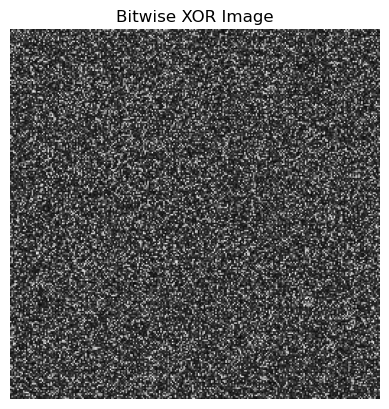

In [8]:
'''XOR Process'''
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
'''SCRAMBLED IMAGE ARRAY'''

# Convert image to numpy array
image_array1 = scrambled_array1
print("Image Array Shape:", image_array1.shape)
print("Grayscale Array:\n", image_array1)


# Convert image to numpy array
image_array2 = artificial_image_array
print("Image Array Shape:", image_array2.shape)
print("Grayscale Array:\n", image_array2)

image_path_3 = r"C:\Users\srisu\OneDrive\Desktop\baboon.jpg" # replace with your image path
image3 = Image.open(image_path_3).convert('L')  # Convert to grayscale
# Convert image to numpy array
image_array3 = np.array(image3)
print("Image Array Shape:", image_array3.shape)
print("Grayscale Array:\n", image_array3)


xor_img1 = np.bitwise_xor(image_array1, image_array2)
plt.imshow(xor_img1, cmap='gray')
plt.title('Bitwise XOR Image')
plt.axis('off')
img1_xor=xor_img1
cv2.imwrite(r"C:\Users\srisu\Encryption Project\pelvis_results\pelvis_stage_1_encrypted.jpg", img1_xor)
#plt.show()
xor_img2 = np.bitwise_xor(xor_img1, image_array3)
plt.imshow(xor_img2, cmap='gray')
plt.title('Bitwise XOR Image')
plt.axis('off')
img2_xor=xor_img2
cv2.imwrite(r"C:\Users\srisu\Encryption Project\pelvis_results\pelvis_encrypted.jpg",img2_xor)

xor_img3 = np.bitwise_xor(xor_img2, image_array3)
plt.imshow(xor_img3, cmap='gray')
plt.title('Bitwise XOR Image')
plt.axis('off')

xor_img4 = np.bitwise_xor(xor_img3, image_array2)
plt.imshow(xor_img4, cmap='gray')
plt.title('Bitwise XOR Image')
plt.axis('off')
img4_xor=xor_img4
cv2.imwrite(r"C:\Users\srisu\Encryption Project\pelvis_results\pelvis_stage_1_decrypted.jpg",img4_xor)

In [9]:
'''DESCRAMBLING PROCESS'''
import numpy as np
from PIL import Image

def load_indices_from_file(indices_path):
    with open(indices_path, 'r') as file:
        indices = [int(line.strip()) for line in file if line.strip().isdigit()]
    return indices

def descramble_array(scrambled_array, indices):
    # Flatten the scrambled array
    flat_scrambled = scrambled_array.flatten()

    # Create an array for the original data
    original_array = np.zeros_like(flat_scrambled)

    # Assign pixels back to their original positions based on the provided indices
    for original_index, scrambled_index in enumerate(indices):
        if 0 <= scrambled_index < len(flat_scrambled):  # Check if scrambled index is valid
            original_array[original_index] = flat_scrambled[scrambled_index]
        else:
            print(f"Warning: Scrambled index {scrambled_index} is out of bounds.")

    # Reshape back to the original array dimensions
    descrambled_array = original_array.reshape(scrambled_array.shape)

    return descrambled_array

def save_array_as_image(array, output_path):
    image = Image.fromarray(array)
    image.save(output_path)
    print(f"Image saved at: {output_path}")

# Main function to descramble
def descramble(scrambled_array, indices_path, output_path):
    # Load indices from the file
    indices = load_indices_from_file(indices_path)

    # Descramble the array
    descrambled_array = descramble_array(scrambled_array, indices)

    # Save the descrambled array as an image
    save_array_as_image(descrambled_array, output_path)

# Example usage:
if __name__ == "__main__":
    # Example scrambled array (grayscale example)
    scrambled_array = xor_img4# Replace with your scrambled array

    # File paths
    indices_path = r"C:\Users\srisu\Encryption Project\ikeda_and_logistic_indices.txt" # Path to indices file
    output_path = r"C:\Users\srisu\Encryption Project\pelvis_results\pelvis_decrypted.jpg"  # Path to save the descrambled image

    # Perform descrambling and save the result
    descramble(scrambled_array, indices_path, output_path)


Image saved at: C:\Users\srisu\Encryption Project\pelvis_results\pelvis_decrypted.jpg


In [10]:
'''UACI'''
from PIL import Image
import numpy as np

def calculate_uaci(image1, image2):
    """
    Calculate the Unified Average Changing Intensity (UACI) between two images.

    Args:
        image1 (np.ndarray): Original grayscale image as a NumPy array.
        image2 (np.ndarray): Encrypted or modified grayscale image as a NumPy array.

    Returns:
        float: UACI value in percentage.
    """
    if not isinstance(image1, np.ndarray) or not isinstance(image2, np.ndarray):
        raise TypeError("Both inputs must be NumPy arrays.")
    if image1.shape != image2.shape:
        raise ValueError("Both images must have the same dimensions.")

    # Calculate absolute difference and UACI
    diff = np.abs(image1.astype(np.int16) - image2.astype(np.int16))
    uaci = np.mean(diff) / 255 * 100  # Mean normalization and conversion to percentage
    return uaci

# Example usage
original_image_path = r"C:\Users\srisu\Encryption Project\pelvis_results\pelvis.jpg"
encrypted_image_path = r"C:\Users\srisu\Encryption Project\pelvis_results\pelvis_encrypted.jpg"

try:
    # Load images as grayscale and convert to NumPy arrays
    original_image = np.array(Image.open(original_image_path).convert('L'))
    encrypted_image = np.array(Image.open(encrypted_image_path).convert('L'))

    # Calculate UACI
    uaci_value = calculate_uaci(original_image, encrypted_image)
    print(f"UACI: {uaci_value:.6f}%")  # Increased decimal points to 6
except FileNotFoundError as e:
    print(f"Error: File not found. {e}")
except Exception as e:
    print(f"An error occurred: {e}")

UACI: 33.859032%
